# knn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import sklearn.datasets
import sklearn.model_selection

## 分类

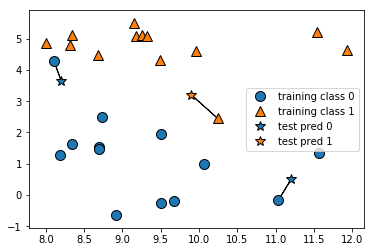

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

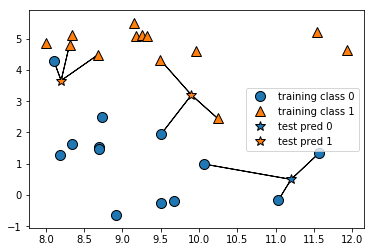

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)#星表示新增数据

In [2]:
#利用forge数据
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,random_state=0)

In [3]:
#导入类并且实例化
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [5]:
print("test set accuracy:{:.2f}".format(clf.score(X_test,y_test)))

test set accuracy:0.86


## 分析KNeighborsClassifier

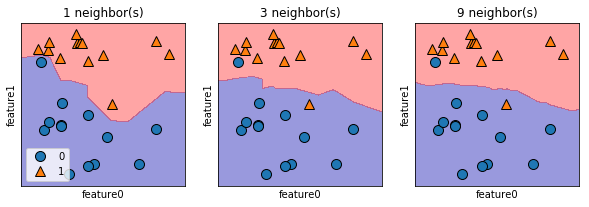

In [11]:
fig,axes=plt.subplots(1,3,figsize=(10,3))
#这种用法，可以一下子产生2x3个子窗口，并且以numpy数组的方式保存在axes中
for n_neighbors,ax in zip([1,3,9],axes):
    #fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")
axes[0].legend(loc=3)
#不同n_neighbors值得k近邻模型的决策边界

### 模型复杂度和泛化能力

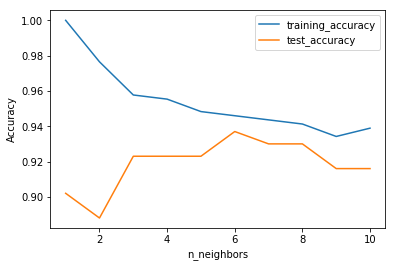

In [15]:
#利用canceer数据来说明
cancer=sklearn.datasets.load_breast_cancer()
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(cancer['data'],
                                                                       cancer['target'],stratify=cancer['target'],random_state=66)
#将stratify=X就是按照X中的比例分配 
#将stratify=y就是按照y中的比例分配 
training_accuracy=[]
test_accuracy=[]
#n_neighbors从1取到10
for n_neighbors in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    #记录训练精度
    training_accuracy.append(clf.score(X_train,y_train))
    #记录泛化精度
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(range(1,11),training_accuracy,label='training_accuracy')
plt.plot(range(1,11),test_accuracy,label='test_accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 回归

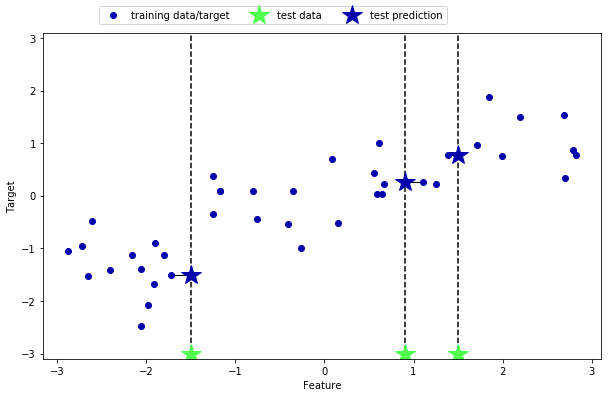

In [16]:
#通过wave数据集来说明
mglearn.plots.plot_knn_regression(n_neighbors=1)
#最近邻的目标值

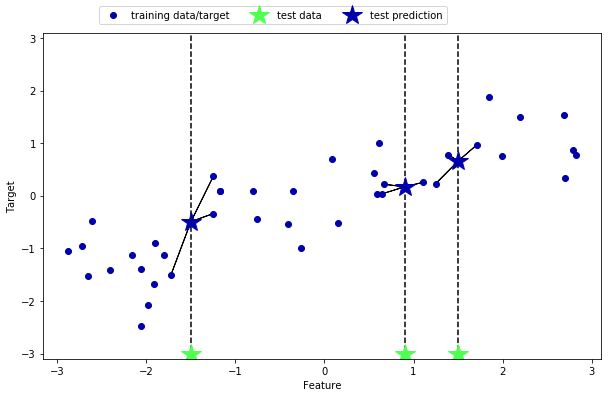

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
#最近邻的平均值

In [26]:
X,y=mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,random_state=0)
#模型实例化，并设置邻居数为3
reg=sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print('test set prediction:\n{}'.format(reg.predict(X_test)))
#拟合的score为R2
print("test set R^2：{:.2f}".format(reg.score(X_test,y_test))) 

test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
test set R^2：0.83


### 分析knn拟合

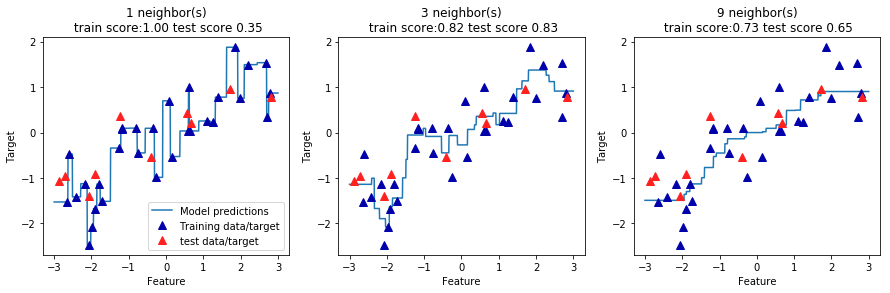

In [29]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
#创建1000个数据点，在-3和3之间均匀分布
line=np.linspace(-3,3,1000).reshape(-1,1)  
#reshape(-1,1)表示不确定有几行，列固定为1，reshape（2，-1）表示不确定有几列，行固定为2
for n_neighbors,ax in zip([1,3,9],axes):
    reg=sklearn.neighbors.KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'^',c=mglearn.cm2(1),markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score:{:.2f} test score {:.2f}".format(
    n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Training data/target","test data/target"],loc="best")
#从图中可以看出，仅使用单一邻居，训练集中的每个点都对预测结果有显著影响，预测结
#果的图像经过所有数据点。这导致预测结果非常不稳定。考虑更多的邻居之后，预测结果
#d变得更加平滑，但对训练数据的拟合也不好

### 优点参数和缺点

In [ ]:
#KNeighbors分类器有两个重要参数：邻居个数与数据点之间距离的度量方法。在实践中，使用较小的
#邻居个数（比如3个），但你应该调节这个参数。选择合适的距离度量方法超出了本书的范围，默认使用欧式距离，他在许多情况下的效果都很好。
#knn的有点质疑就是模型很容易理解，通常不需要过多调节就可以得到不错的性能。在考虑使用更高阶的技术之前，
#尝试此算法是一种很好的基准方法。构建最近邻模型的速度通常很快，但如果训练集很大（特征数很多或者样本数很大）
#预测效果可能会比较慢。
#使用KNN算法时，对数据进行预处理是很重要的（见第三章）。这一算法对于很多特征（几百或更多）的数据集往往效果不好，
#对于大多数特征的大多是取值都为0的数据集（所谓的系数数据集）来说，这一算法的效果尤其不好。

#由于预测速度慢且不能处理具有很多特征的数据集，所以在实践中往往不会用到。